In [1]:
#Importing libraries
import time
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import csv

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
import keras

C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\tensorf

In [2]:
#the csv can be found here
#  https://www.kaggle.com/deadskull7/fer2013
##

#reading the data
with open("fer2013.csv") as f:
    content = f.readlines()

lines = np.array(content)
num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

number of instances:  35888
instance length:  2304


In [13]:
#initialize trainset and test set
x_train, y_train, x_test, y_test = [], [], [], []

In [14]:
#transfer train and test set data
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")  
        val = img.split(" ")     
        pixels = np.array(val, 'float32')
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
        print("",end="")

In [15]:
#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train)
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test)

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

# Visualize image

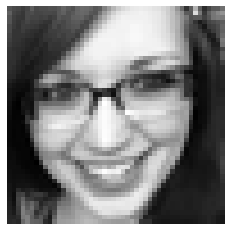

In [17]:
some_digit = x_test[4]
some_digit_image = some_digit.reshape(48,48)
plt.imshow(some_digit_image, 
          interpolation="nearest", cmap='gray')
plt.axis("off")
plt.show()

In [18]:
def emotion_analysis(emotions):
    # emotion dic with integer keys 
    my_dict = dict({0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'})

    return my_dict.get(int(emotions))

In [19]:
emotion_analysis(y_test[4])

'Happy'

# Random Forest

In [20]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
import sklearn

In [21]:
#create model and fit 

rfc = RandomForestClassifier(n_jobs=-1, n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [22]:
#accuracy of the model
rfc.score(x_test, y_test)

0.459738088604068

In [23]:
#predicting validation set from the csv
y_pred = rfc.predict(x_test)
y_pred

array(['2', '3', '3', ..., '0', '3', '4'], dtype='<U1')

In [24]:
rfc.predict_proba(x_test)[0:10, 3]

array([0.16, 0.32, 0.24, 0.28, 0.48, 0.41, 0.17, 0.13, 0.2 , 0.17])

# Testing



In [25]:
from keras.preprocessing import image
from IPython.display import display 
from PIL import Image

C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Sad


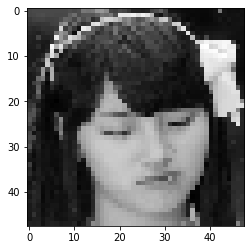

In [26]:
#loading an image of suzy to test
img = image.load_img("9.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x /= 255
 
#predicting uploaded image    
custom = rfc.predict(x.reshape(1, -1))

print(emotion_analysis(custom[0]))
 
x = np.array(x, 'float32')
x = x.reshape([48, 48]);
 
plt.gray()
plt.imshow(x)
plt.show()

# Performance Metrics

In [27]:
# Evaluate model with confusion matrix, classification report and accuracy score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 95   0  33 170  72  22  75]
 [  5  15   4  23   1   3   5]
 [ 24   0 135 142  79  45  71]
 [ 26   0  20 704  65  21  59]
 [ 47   0  41 234 219   9 103]
 [ 16   0  40  65  18 251  25]
 [ 23   0  39 220  79  15 231]]
              precision    recall  f1-score   support

           0       0.40      0.20      0.27       467
           1       1.00      0.27      0.42        56
           2       0.43      0.27      0.33       496
           3       0.45      0.79      0.57       895
           4       0.41      0.34      0.37       653
           5       0.69      0.60      0.64       415
           6       0.41      0.38      0.39       607

    accuracy                           0.46      3589
   macro avg       0.54      0.41      0.43      3589
weighted avg       0.46      0.46      0.44      3589

0.459738088604068


<Figure size 864x576 with 0 Axes>

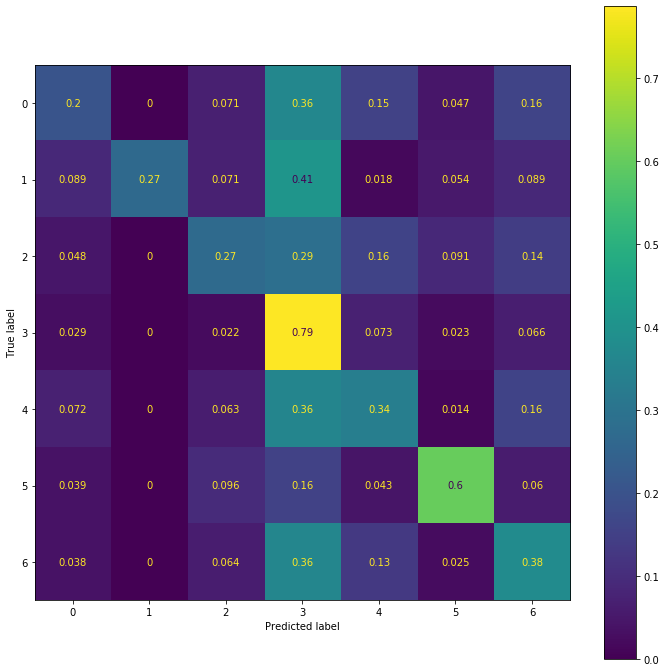

In [28]:
plt.figure(figsize=(12,8))
f,ax=plt.subplots(1,1,figsize=(12,12))
# print("Classification report for classifier %s:\n%s\n"
#       % (rfc, metrics.classification_report(y_test, y_pred)))
disp = metrics.plot_confusion_matrix(rfc, x_test, y_test,normalize='true',ax=ax)

# ROC Curve

In [21]:
y_probas_0 = rfc.predict_proba(x_test)[:,0]
y_probas_1 = rfc.predict_proba(x_test)[:,1]
y_probas_2 = rfc.predict_proba(x_test)[:,2]
y_probas_3 = rfc.predict_proba(x_test)[:,3]
y_probas_4 = rfc.predict_proba(x_test)[:,4]
y_probas_5 = rfc.predict_proba(x_test)[:,5]
y_probas_6 = rfc.predict_proba(x_test)[:,6]
#y_probas_forest

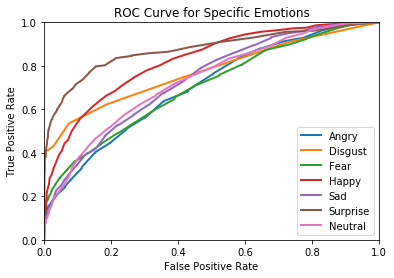

In [22]:
# Plot an ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probas_0, pos_label='0')
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, y_probas_1, pos_label='1')
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test, y_probas_2, pos_label='2')
fpr4, tpr4, thresholds3 = metrics.roc_curve(y_test, y_probas_3, pos_label='3')
fpr5, tpr5, thresholds5 = metrics.roc_curve(y_test, y_probas_4, pos_label='4')
fpr6, tpr6, thresholds6 = metrics.roc_curve(y_test, y_probas_5, pos_label='5')
fpr7, tpr7, thresholds7 = metrics.roc_curve(y_test, y_probas_6, pos_label='6')
plt.title('ROC Curve for Specific Emotions')
plt.plot(fpr, tpr, linewidth=2)
plt.plot(fpr2, tpr2, linewidth=2)
plt.plot(fpr3, tpr3, linewidth=2)
plt.plot(fpr4, tpr4, linewidth=2)
plt.plot(fpr5, tpr5, linewidth=2)
plt.plot(fpr6, tpr6, linewidth=2)
plt.plot(fpr7, tpr7, linewidth=2)
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'], loc='lower right')
plt.show()

# Testing with Suzy's pictures

In [29]:
happy_count = 0
sad_count = 0
pred = []
arr = []
for i in range(40): #loading all the images from the folder (40 images, first 20 happy and rest is sad)
    img = image.load_img("validation_suzy/suzy/" + str(i+1) +".JPG", grayscale=True, target_size=(48, 48))
 
    i = image.img_to_array(img)
    i = np.expand_dims(i, axis = 0)
    i /= 255
    custom = rfc.predict(i.reshape(1, -1))

    a = emotion_analysis(custom[0])

    i = np.array(i, 'float32')
    i = i.reshape([48, 48]);
    
    if a == "Happy":
        happy_count += 1
    elif a == "Sad":
        sad_count += 1
    
    #keeping track of what our model predicted
    arr.append(a)
    print(a)

C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Happy
Happy


C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Neutral
Sad


C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Neutral
Happy


C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Happy
Happy


C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Happy
Happy


C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Happy
Happy


C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Happy
Sad


C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Fear
Sad


C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Neutral
Happy


C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Happy
Neutral


C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Sad
Neutral


C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Happy
Sad


C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Sad
Sad


C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Happy
Sad


C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Sad
Sad


C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Sad
Happy


C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Sad
Happy


C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Happy
Neutral


C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Sad
Sad


C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Sad
Neutral


In [30]:
happy_count, sad_count

(17, 15)

In [31]:
pred = arr
pred

['Happy',
 'Happy',
 'Neutral',
 'Sad',
 'Neutral',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Sad',
 'Fear',
 'Sad',
 'Neutral',
 'Happy',
 'Happy',
 'Neutral',
 'Sad',
 'Neutral',
 'Happy',
 'Sad',
 'Sad',
 'Sad',
 'Happy',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Happy',
 'Sad',
 'Happy',
 'Happy',
 'Neutral',
 'Sad',
 'Sad',
 'Sad',
 'Neutral']

In [32]:
# Adding actual data 
actual=[]

for i in range(20):
    actual.append('Happy')
for i in range(20):
    actual.append('Sad')

In [33]:
#order of actual images
actual

['Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Sad']

In [34]:
# Getting the confusion matrix
print(confusion_matrix(actual, pred))
print(classification_report(actual,pred))
print(accuracy_score(actual, pred))

[[ 0  0  0  0]
 [ 1 12  4  3]
 [ 0  0  0  0]
 [ 0  5  3 12]]
              precision    recall  f1-score   support

        Fear       0.00      0.00      0.00         0
       Happy       0.71      0.60      0.65        20
     Neutral       0.00      0.00      0.00         0
         Sad       0.80      0.60      0.69        20

    accuracy                           0.60        40
   macro avg       0.38      0.30      0.33        40
weighted avg       0.75      0.60      0.67        40

0.6


C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
